# 도로 상황 분류 프로젝트

### 데이터 로드

* youtube 데이터 15000개 로드


In [67]:
from torchvision import transforms
import torchvision

In [68]:
# 가로로 절반으로 자르는 함수 정의
def crop_horizontal_half(img):
    width, height = img.size

    cropped_img = img.crop((0, height//2, width,height))
    # cropped_img = img.crop((0, 0, width,height//2))
    return cropped_img

In [69]:
from torchvision import transforms
import torchvision


transform= transforms.Compose(
    [   
        transforms.Lambda(crop_horizontal_half),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        # transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])

    ]
)


datasets = torchvision.datasets.ImageFolder(root='D:\Weather conditions driving classification data (All)\images',transform=transform)

In [70]:
datasets

Dataset ImageFolder
    Number of datapoints: 30000
    Root location: D:\Weather conditions driving classification data (All)\images
    StandardTransform
Transform: Compose(
               Lambda()
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [72]:
from torch.utils.data import random_split

datasets_size = len(datasets)
print(datasets_size)
test_ratio = 0.2

train_datasets , test_datasets = random_split(datasets,[int(datasets_size*0.8),int(datasets_size*0.2)])

30000


In [73]:
train_datasets

In [74]:
from torch.utils.data import DataLoader

imgae_gird_loader = DataLoader(train_datasets,batch_size=10,shuffle=True)
train_loader = DataLoader(train_datasets,batch_size=32,shuffle=True)
test_loader = DataLoader(test_datasets,batch_size=32,shuffle=True)

In [84]:
data,label = next(iter(train_loader))
data.shape

torch.Size([32, 3, 224, 224])

In [85]:
label

tensor([2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1,
        0, 0, 0, 1, 0, 1, 0, 1])

In [91]:
import matplotlib.pyplot as plt

def imshow(img,title):

  # transform에서 tensor로 바꾸었기때문에 numpy()화
  print(img.numpy().shape)
  # c,w,h => w,h,c 변환
  img = img.numpy().transpose((1,2,0))
  print("shape : ",img.shape)
  # std = np.array([0.229,0.224,0.225])
  # mean = np.array([0.485,0.456,0.406])

  # img = std*img+mean
  # print("clip 전 : ",img)
  # img = np.clip(img,0,1)
  # print("clip 후 : ",img)

  plt.figure(figsize=(20,20))
  plt.imshow(img)
  plt.title(title)
  plt.show()

data shape :  torch.Size([32, 3, 224, 224])
data type :  <class 'torch.Tensor'>
out type :  <class 'torch.Tensor'>
out shape :  torch.Size([3, 906, 1810])
(3, 906, 1810)
shape :  (906, 1810, 3)


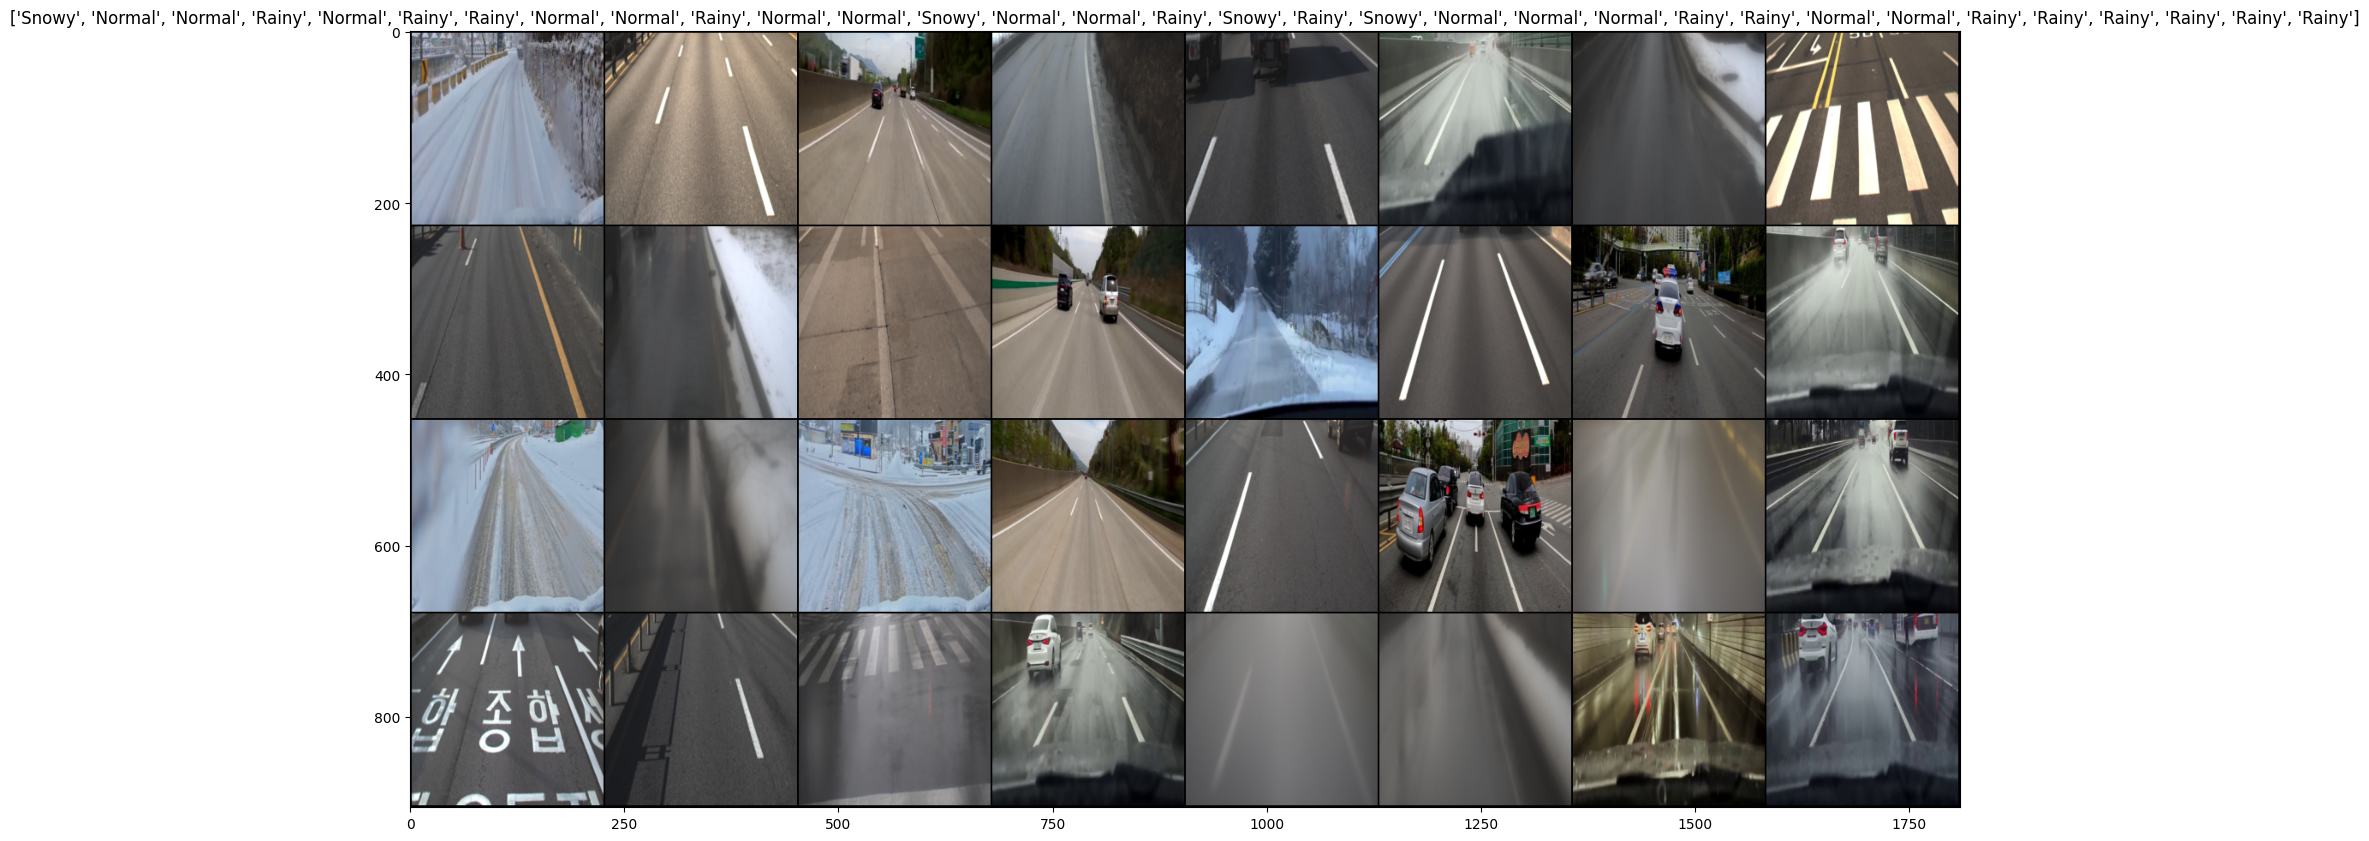

In [92]:
class_names = ['Normal','Rainy','Snowy']

iter_ = iter(imgae_gird_loader)

data, labels = next(iter_)
# 배치 갯수만큼 나오기 때문에 make_grid() 사용
print("data shape : " ,data.shape)
print("data type : ",type(data))
out = torchvision.utils.make_grid(data)
print("out type : ",type(out))
print("out shape : ", out.shape)
imshow(out,title=[class_names[i] for i in labels])

In [75]:
model = torchvision.models.resnet34(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [76]:
for param in model.parameters():
  # param.requires_grad = False == > 전부 동결
  param.requires_grad = True

In [77]:
fc_input_features = model.fc.in_features
fc_input_features

512

In [79]:
import torch.nn as nn

# 마지막 분류기만 수정
model.fc = nn.Linear(fc_input_features,3)

for name,module in model.named_parameters():
  print("name : ",name," module.requres_grad : ", module.requires_grad)

name :  conv1.weight  module.requres_grad :  True
name :  bn1.weight  module.requres_grad :  True
name :  bn1.bias  module.requres_grad :  True
name :  layer1.0.conv1.weight  module.requres_grad :  True
name :  layer1.0.bn1.weight  module.requres_grad :  True
name :  layer1.0.bn1.bias  module.requres_grad :  True
name :  layer1.0.conv2.weight  module.requres_grad :  True
name :  layer1.0.bn2.weight  module.requres_grad :  True
name :  layer1.0.bn2.bias  module.requres_grad :  True
name :  layer1.1.conv1.weight  module.requres_grad :  True
name :  layer1.1.bn1.weight  module.requres_grad :  True
name :  layer1.1.bn1.bias  module.requres_grad :  True
name :  layer1.1.conv2.weight  module.requres_grad :  True
name :  layer1.1.bn2.weight  module.requres_grad :  True
name :  layer1.1.bn2.bias  module.requres_grad :  True
name :  layer1.2.conv1.weight  module.requres_grad :  True
name :  layer1.2.bn1.weight  module.requres_grad :  True
name :  layer1.2.bn1.bias  module.requres_grad :  True
n

In [94]:
import torch
import torch.optim as optim
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

optim = optim.Adam(model.parameters(),lr=1e-4)
model.to(device)

# 학습 모드
# model.train()

for epoch in range(5):
  for data, labels in tqdm(train_loader):

    optim.zero_grad()
    preds = model(data.to(device))
    loss = nn.CrossEntropyLoss()(preds,labels.to(device))
    loss.backward()

    optim.step()
  print("epoch : ",epoch+1, " loss : ", loss.item())

cuda


  0%|          | 0/750 [00:00<?, ?it/s]

100%|██████████| 750/750 [08:35<00:00,  1.45it/s]


epoch :  1  loss :  0.0013187299482524395


100%|██████████| 750/750 [07:30<00:00,  1.67it/s]


epoch :  2  loss :  0.014337937347590923


100%|██████████| 750/750 [07:34<00:00,  1.65it/s]


epoch :  3  loss :  0.026479478925466537


100%|██████████| 750/750 [07:29<00:00,  1.67it/s]


epoch :  4  loss :  3.2463023671880364e-05


100%|██████████| 750/750 [08:14<00:00,  1.52it/s]

epoch :  5  loss :  0.0002618205617181957


In [97]:
# 모델에 dropout, normalize 적용 안되게함
model.eval()

corr = 0
with torch.no_grad():
  for data, labels in tqdm(test_loader):
    preds = model(data.to(device))
    pred = torch.max(preds,1)[1]
    corr += torch.sum(pred==labels.to(device).data)

    print(f'예측결과 : {class_names[pred[0]]}  실제정답 : {class_names[labels.data[0]]}')
    # 출력하기 위해 data를 다시 cpu로
    # imshow(data.cpu().data[0],title=class_names[pred[0]])
  acc = corr / len(test_datasets)
  print("acc : ",acc)

  1%|          | 1/188 [00:00<01:45,  1.77it/s]

예측결과 : Snowy  실제정답 : Snowy


  1%|          | 2/188 [00:00<01:28,  2.09it/s]

예측결과 : Normal  실제정답 : Normal


  2%|▏         | 3/188 [00:01<01:28,  2.09it/s]

예측결과 : Snowy  실제정답 : Snowy


  2%|▏         | 4/188 [00:01<01:21,  2.25it/s]

예측결과 : Snowy  실제정답 : Snowy


  3%|▎         | 5/188 [00:02<01:24,  2.17it/s]

예측결과 : Normal  실제정답 : Normal


  3%|▎         | 6/188 [00:02<01:25,  2.14it/s]

예측결과 : Normal  실제정답 : Normal


  4%|▎         | 7/188 [00:03<01:27,  2.08it/s]

예측결과 : Normal  실제정답 : Normal


  4%|▍         | 8/188 [00:03<01:28,  2.03it/s]

예측결과 : Rainy  실제정답 : Rainy


  5%|▍         | 9/188 [00:04<01:30,  1.97it/s]

예측결과 : Rainy  실제정답 : Rainy


  5%|▌         | 10/188 [00:04<01:32,  1.93it/s]

예측결과 : Snowy  실제정답 : Snowy


  6%|▌         | 11/188 [00:05<01:32,  1.92it/s]

예측결과 : Snowy  실제정답 : Snowy


  6%|▋         | 12/188 [00:05<01:30,  1.94it/s]

예측결과 : Normal  실제정답 : Normal


  7%|▋         | 13/188 [00:06<01:32,  1.88it/s]

예측결과 : Normal  실제정답 : Normal


  7%|▋         | 14/188 [00:07<01:31,  1.90it/s]

예측결과 : Normal  실제정답 : Normal


  8%|▊         | 15/188 [00:07<01:29,  1.93it/s]

예측결과 : Snowy  실제정답 : Snowy


  9%|▊         | 16/188 [00:08<01:32,  1.86it/s]

예측결과 : Snowy  실제정답 : Snowy


  9%|▉         | 17/188 [00:08<01:30,  1.89it/s]

예측결과 : Rainy  실제정답 : Rainy


 10%|▉         | 18/188 [00:09<01:30,  1.88it/s]

예측결과 : Normal  실제정답 : Normal


 10%|█         | 19/188 [00:09<01:28,  1.91it/s]

예측결과 : Snowy  실제정답 : Snowy


 11%|█         | 20/188 [00:10<01:30,  1.87it/s]

예측결과 : Normal  실제정답 : Normal


 11%|█         | 21/188 [00:10<01:28,  1.89it/s]

예측결과 : Rainy  실제정답 : Rainy


 12%|█▏        | 22/188 [00:11<01:26,  1.92it/s]

예측결과 : Rainy  실제정답 : Rainy


 12%|█▏        | 23/188 [00:11<01:26,  1.90it/s]

예측결과 : Normal  실제정답 : Normal


 13%|█▎        | 24/188 [00:12<01:30,  1.81it/s]

예측결과 : Normal  실제정답 : Normal


 13%|█▎        | 25/188 [00:12<01:27,  1.86it/s]

예측결과 : Snowy  실제정답 : Snowy


 14%|█▍        | 26/188 [00:13<01:26,  1.86it/s]

예측결과 : Normal  실제정답 : Normal


 14%|█▍        | 27/188 [00:13<01:25,  1.89it/s]

예측결과 : Snowy  실제정답 : Snowy


 15%|█▍        | 28/188 [00:14<01:23,  1.91it/s]

예측결과 : Snowy  실제정답 : Snowy


 15%|█▌        | 29/188 [00:15<01:23,  1.89it/s]

예측결과 : Snowy  실제정답 : Snowy


 16%|█▌        | 30/188 [00:15<01:22,  1.92it/s]

예측결과 : Normal  실제정답 : Normal


 16%|█▋        | 31/188 [00:16<01:24,  1.86it/s]

예측결과 : Normal  실제정답 : Normal


 17%|█▋        | 32/188 [00:16<01:23,  1.87it/s]

예측결과 : Normal  실제정답 : Normal


 18%|█▊        | 33/188 [00:17<01:20,  1.93it/s]

예측결과 : Rainy  실제정답 : Rainy


 18%|█▊        | 34/188 [00:17<01:18,  1.96it/s]

예측결과 : Rainy  실제정답 : Rainy


 19%|█▊        | 35/188 [00:18<01:16,  2.00it/s]

예측결과 : Snowy  실제정답 : Snowy


 19%|█▉        | 36/188 [00:18<01:16,  1.98it/s]

예측결과 : Normal  실제정답 : Normal


 20%|█▉        | 37/188 [00:19<01:16,  1.98it/s]

예측결과 : Snowy  실제정답 : Snowy


 20%|██        | 38/188 [00:19<01:16,  1.97it/s]

예측결과 : Normal  실제정답 : Normal


 21%|██        | 39/188 [00:20<01:13,  2.02it/s]

예측결과 : Rainy  실제정답 : Rainy


 21%|██▏       | 40/188 [00:20<01:16,  1.94it/s]

예측결과 : Rainy  실제정답 : Rainy


 22%|██▏       | 41/188 [00:21<01:16,  1.91it/s]

예측결과 : Rainy  실제정답 : Rainy


 22%|██▏       | 42/188 [00:21<01:17,  1.88it/s]

예측결과 : Normal  실제정답 : Normal


 23%|██▎       | 43/188 [00:22<01:16,  1.88it/s]

예측결과 : Normal  실제정답 : Normal


 23%|██▎       | 44/188 [00:22<01:16,  1.88it/s]

예측결과 : Snowy  실제정답 : Snowy


 24%|██▍       | 45/188 [00:23<01:17,  1.84it/s]

예측결과 : Snowy  실제정답 : Snowy


 24%|██▍       | 46/188 [00:23<01:16,  1.85it/s]

예측결과 : Rainy  실제정답 : Rainy


 25%|██▌       | 47/188 [00:24<01:14,  1.89it/s]

예측결과 : Snowy  실제정답 : Snowy


 26%|██▌       | 48/188 [00:24<01:11,  1.96it/s]

예측결과 : Rainy  실제정답 : Rainy


 26%|██▌       | 49/188 [00:25<01:12,  1.93it/s]

예측결과 : Snowy  실제정답 : Snowy


 27%|██▋       | 50/188 [00:25<01:10,  1.95it/s]

예측결과 : Snowy  실제정답 : Snowy


 27%|██▋       | 51/188 [00:26<01:11,  1.92it/s]

예측결과 : Snowy  실제정답 : Snowy


 28%|██▊       | 52/188 [00:26<01:11,  1.90it/s]

예측결과 : Rainy  실제정답 : Rainy


 28%|██▊       | 53/188 [00:27<01:11,  1.88it/s]

예측결과 : Rainy  실제정답 : Rainy


 29%|██▊       | 54/188 [00:28<01:09,  1.93it/s]

예측결과 : Rainy  실제정답 : Rainy


 29%|██▉       | 55/188 [00:28<01:06,  2.01it/s]

예측결과 : Rainy  실제정답 : Rainy


 30%|██▉       | 56/188 [00:29<01:11,  1.85it/s]

예측결과 : Rainy  실제정답 : Rainy


 30%|███       | 57/188 [00:29<01:13,  1.78it/s]

예측결과 : Normal  실제정답 : Normal


 31%|███       | 58/188 [00:30<01:11,  1.82it/s]

예측결과 : Snowy  실제정답 : Snowy


 31%|███▏      | 59/188 [00:30<01:10,  1.84it/s]

예측결과 : Rainy  실제정답 : Rainy


 32%|███▏      | 60/188 [00:31<01:12,  1.77it/s]

예측결과 : Rainy  실제정답 : Rainy


 32%|███▏      | 61/188 [00:31<01:12,  1.75it/s]

예측결과 : Rainy  실제정답 : Rainy


 33%|███▎      | 62/188 [00:32<01:14,  1.69it/s]

예측결과 : Snowy  실제정답 : Snowy


 34%|███▎      | 63/188 [00:33<01:14,  1.68it/s]

예측결과 : Rainy  실제정답 : Rainy


 34%|███▍      | 64/188 [00:33<01:17,  1.60it/s]

예측결과 : Normal  실제정답 : Normal


 35%|███▍      | 65/188 [00:34<01:17,  1.59it/s]

예측결과 : Snowy  실제정답 : Snowy


 35%|███▌      | 66/188 [00:35<01:17,  1.57it/s]

예측결과 : Snowy  실제정답 : Snowy


 36%|███▌      | 67/188 [00:35<01:22,  1.46it/s]

예측결과 : Rainy  실제정답 : Rainy


 36%|███▌      | 68/188 [00:36<01:13,  1.63it/s]

예측결과 : Snowy  실제정답 : Snowy


 37%|███▋      | 69/188 [00:36<01:11,  1.67it/s]

예측결과 : Normal  실제정답 : Normal


 37%|███▋      | 70/188 [00:37<01:11,  1.66it/s]

예측결과 : Snowy  실제정답 : Snowy


 38%|███▊      | 71/188 [00:38<01:07,  1.72it/s]

예측결과 : Rainy  실제정답 : Rainy


 38%|███▊      | 72/188 [00:38<01:06,  1.75it/s]

예측결과 : Normal  실제정답 : Normal


 39%|███▉      | 73/188 [00:39<01:05,  1.76it/s]

예측결과 : Snowy  실제정답 : Snowy


 39%|███▉      | 74/188 [00:39<01:01,  1.85it/s]

예측결과 : Normal  실제정답 : Normal


 40%|███▉      | 75/188 [00:40<00:58,  1.92it/s]

예측결과 : Snowy  실제정답 : Snowy


 40%|████      | 76/188 [00:40<00:59,  1.89it/s]

예측결과 : Normal  실제정답 : Normal


 41%|████      | 77/188 [00:41<00:57,  1.93it/s]

예측결과 : Rainy  실제정답 : Rainy


 41%|████▏     | 78/188 [00:41<00:58,  1.87it/s]

예측결과 : Rainy  실제정답 : Rainy


 42%|████▏     | 79/188 [00:42<00:57,  1.90it/s]

예측결과 : Snowy  실제정답 : Snowy


 43%|████▎     | 80/188 [00:42<00:55,  1.95it/s]

예측결과 : Snowy  실제정답 : Snowy


 43%|████▎     | 81/188 [00:43<00:54,  1.98it/s]

예측결과 : Normal  실제정답 : Normal


 44%|████▎     | 82/188 [00:43<00:54,  1.93it/s]

예측결과 : Snowy  실제정답 : Snowy


 44%|████▍     | 83/188 [00:44<00:51,  2.02it/s]

예측결과 : Normal  실제정답 : Normal


 45%|████▍     | 84/188 [00:44<00:52,  1.97it/s]

예측결과 : Snowy  실제정답 : Snowy


 45%|████▌     | 85/188 [00:45<00:50,  2.06it/s]

예측결과 : Normal  실제정답 : Normal


 46%|████▌     | 86/188 [00:45<00:50,  2.03it/s]

예측결과 : Normal  실제정답 : Normal


 46%|████▋     | 87/188 [00:46<00:49,  2.04it/s]

예측결과 : Snowy  실제정답 : Snowy


 47%|████▋     | 88/188 [00:46<00:50,  2.00it/s]

예측결과 : Normal  실제정답 : Normal


 47%|████▋     | 89/188 [00:47<00:49,  1.99it/s]

예측결과 : Normal  실제정답 : Normal


 48%|████▊     | 90/188 [00:47<00:49,  1.98it/s]

예측결과 : Snowy  실제정답 : Snowy


 48%|████▊     | 91/188 [00:48<00:47,  2.03it/s]

예측결과 : Snowy  실제정답 : Snowy


 49%|████▉     | 92/188 [00:48<00:47,  2.03it/s]

예측결과 : Rainy  실제정답 : Rainy


 49%|████▉     | 93/188 [00:49<00:47,  1.98it/s]

예측결과 : Rainy  실제정답 : Rainy


 50%|█████     | 94/188 [00:49<00:47,  1.99it/s]

예측결과 : Normal  실제정답 : Normal


 51%|█████     | 95/188 [00:50<00:45,  2.03it/s]

예측결과 : Snowy  실제정답 : Snowy


 51%|█████     | 96/188 [00:50<00:45,  2.00it/s]

예측결과 : Rainy  실제정답 : Rainy


 52%|█████▏    | 97/188 [00:51<00:45,  2.02it/s]

예측결과 : Snowy  실제정답 : Snowy


 52%|█████▏    | 98/188 [00:51<00:45,  1.96it/s]

예측결과 : Snowy  실제정답 : Snowy


 53%|█████▎    | 99/188 [00:52<00:43,  2.03it/s]

예측결과 : Snowy  실제정답 : Snowy


 53%|█████▎    | 100/188 [00:52<00:43,  2.03it/s]

예측결과 : Snowy  실제정답 : Snowy


 54%|█████▎    | 101/188 [00:53<00:43,  2.01it/s]

예측결과 : Normal  실제정답 : Normal


 54%|█████▍    | 102/188 [00:53<00:42,  2.02it/s]

예측결과 : Normal  실제정답 : Normal


 55%|█████▍    | 103/188 [00:54<00:42,  2.01it/s]

예측결과 : Snowy  실제정답 : Snowy


 55%|█████▌    | 104/188 [00:54<00:42,  1.97it/s]

예측결과 : Rainy  실제정답 : Rainy


 56%|█████▌    | 105/188 [00:55<00:46,  1.80it/s]

예측결과 : Snowy  실제정답 : Snowy


 56%|█████▋    | 106/188 [00:56<00:46,  1.75it/s]

예측결과 : Snowy  실제정답 : Snowy


 57%|█████▋    | 107/188 [00:56<00:49,  1.64it/s]

예측결과 : Snowy  실제정답 : Snowy


 57%|█████▋    | 108/188 [00:57<00:47,  1.70it/s]

예측결과 : Snowy  실제정답 : Snowy


 58%|█████▊    | 109/188 [00:57<00:46,  1.71it/s]

예측결과 : Snowy  실제정답 : Snowy


 59%|█████▊    | 110/188 [00:58<00:45,  1.71it/s]

예측결과 : Snowy  실제정답 : Snowy


 59%|█████▉    | 111/188 [00:58<00:43,  1.77it/s]

예측결과 : Rainy  실제정답 : Rainy


 60%|█████▉    | 112/188 [00:59<00:42,  1.78it/s]

예측결과 : Rainy  실제정답 : Rainy


 60%|██████    | 113/188 [01:00<00:41,  1.82it/s]

예측결과 : Normal  실제정답 : Normal


 61%|██████    | 114/188 [01:00<00:38,  1.91it/s]

예측결과 : Snowy  실제정답 : Snowy


 61%|██████    | 115/188 [01:01<00:38,  1.92it/s]

예측결과 : Snowy  실제정답 : Snowy


 62%|██████▏   | 116/188 [01:01<00:39,  1.84it/s]

예측결과 : Rainy  실제정답 : Rainy


 62%|██████▏   | 117/188 [01:02<00:39,  1.81it/s]

예측결과 : Normal  실제정답 : Normal


 63%|██████▎   | 118/188 [01:02<00:38,  1.82it/s]

예측결과 : Rainy  실제정답 : Rainy


 63%|██████▎   | 119/188 [01:03<00:39,  1.77it/s]

예측결과 : Rainy  실제정답 : Rainy


 64%|██████▍   | 120/188 [01:03<00:38,  1.76it/s]

예측결과 : Rainy  실제정답 : Rainy


 64%|██████▍   | 121/188 [01:04<00:37,  1.78it/s]

예측결과 : Rainy  실제정답 : Rainy


 65%|██████▍   | 122/188 [01:05<00:38,  1.72it/s]

예측결과 : Snowy  실제정답 : Snowy


 65%|██████▌   | 123/188 [01:05<00:37,  1.74it/s]

예측결과 : Rainy  실제정답 : Rainy


 66%|██████▌   | 124/188 [01:06<00:35,  1.82it/s]

예측결과 : Snowy  실제정답 : Snowy


 66%|██████▋   | 125/188 [01:06<00:33,  1.85it/s]

예측결과 : Normal  실제정답 : Normal


 67%|██████▋   | 126/188 [01:07<00:33,  1.87it/s]

예측결과 : Normal  실제정답 : Normal


 68%|██████▊   | 127/188 [01:07<00:32,  1.88it/s]

예측결과 : Snowy  실제정답 : Snowy


 68%|██████▊   | 128/188 [01:08<00:32,  1.85it/s]

예측결과 : Normal  실제정답 : Normal


 69%|██████▊   | 129/188 [01:08<00:30,  1.92it/s]

예측결과 : Snowy  실제정답 : Snowy


 69%|██████▉   | 130/188 [01:09<00:30,  1.91it/s]

예측결과 : Normal  실제정답 : Normal


 70%|██████▉   | 131/188 [01:09<00:32,  1.76it/s]

예측결과 : Normal  실제정답 : Normal


 70%|███████   | 132/188 [01:10<00:32,  1.75it/s]

예측결과 : Rainy  실제정답 : Rainy


 71%|███████   | 133/188 [01:11<00:31,  1.74it/s]

예측결과 : Snowy  실제정답 : Snowy


 71%|███████▏  | 134/188 [01:11<00:32,  1.68it/s]

예측결과 : Snowy  실제정답 : Snowy


 72%|███████▏  | 135/188 [01:12<00:31,  1.70it/s]

예측결과 : Snowy  실제정답 : Snowy


 72%|███████▏  | 136/188 [01:12<00:31,  1.67it/s]

예측결과 : Normal  실제정답 : Normal


 73%|███████▎  | 137/188 [01:13<00:29,  1.73it/s]

예측결과 : Rainy  실제정답 : Rainy


 73%|███████▎  | 138/188 [01:14<00:28,  1.73it/s]

예측결과 : Normal  실제정답 : Normal


 74%|███████▍  | 139/188 [01:14<00:29,  1.68it/s]

예측결과 : Snowy  실제정답 : Snowy


 74%|███████▍  | 140/188 [01:15<00:28,  1.66it/s]

예측결과 : Rainy  실제정답 : Rainy


 75%|███████▌  | 141/188 [01:15<00:28,  1.68it/s]

예측결과 : Rainy  실제정답 : Rainy


 76%|███████▌  | 142/188 [01:16<00:27,  1.68it/s]

예측결과 : Rainy  실제정답 : Rainy


 76%|███████▌  | 143/188 [01:17<00:26,  1.72it/s]

예측결과 : Rainy  실제정답 : Rainy


 77%|███████▋  | 144/188 [01:17<00:26,  1.67it/s]

예측결과 : Snowy  실제정답 : Snowy


 77%|███████▋  | 145/188 [01:18<00:26,  1.63it/s]

예측결과 : Rainy  실제정답 : Rainy


 78%|███████▊  | 146/188 [01:19<00:29,  1.44it/s]

예측결과 : Rainy  실제정답 : Rainy


 78%|███████▊  | 147/188 [01:19<00:26,  1.52it/s]

예측결과 : Snowy  실제정답 : Snowy


 79%|███████▊  | 148/188 [01:20<00:24,  1.61it/s]

예측결과 : Rainy  실제정답 : Rainy


 79%|███████▉  | 149/188 [01:20<00:24,  1.60it/s]

예측결과 : Normal  실제정답 : Normal


 80%|███████▉  | 150/188 [01:21<00:24,  1.58it/s]

예측결과 : Snowy  실제정답 : Snowy


 80%|████████  | 151/188 [01:22<00:23,  1.61it/s]

예측결과 : Snowy  실제정답 : Snowy


 81%|████████  | 152/188 [01:22<00:21,  1.67it/s]

예측결과 : Normal  실제정답 : Normal


 81%|████████▏ | 153/188 [01:23<00:20,  1.71it/s]

예측결과 : Snowy  실제정답 : Snowy


 82%|████████▏ | 154/188 [01:23<00:19,  1.73it/s]

예측결과 : Rainy  실제정답 : Rainy


 82%|████████▏ | 155/188 [01:24<00:19,  1.73it/s]

예측결과 : Snowy  실제정답 : Snowy


 83%|████████▎ | 156/188 [01:25<00:19,  1.63it/s]

예측결과 : Rainy  실제정답 : Rainy


 84%|████████▎ | 157/188 [01:25<00:19,  1.63it/s]

예측결과 : Rainy  실제정답 : Rainy


 84%|████████▍ | 158/188 [01:26<00:17,  1.67it/s]

예측결과 : Snowy  실제정답 : Snowy


 85%|████████▍ | 159/188 [01:26<00:16,  1.72it/s]

예측결과 : Rainy  실제정답 : Rainy


 85%|████████▌ | 160/188 [01:27<00:15,  1.84it/s]

예측결과 : Rainy  실제정답 : Rainy


 86%|████████▌ | 161/188 [01:27<00:14,  1.89it/s]

예측결과 : Snowy  실제정답 : Snowy


 86%|████████▌ | 162/188 [01:28<00:14,  1.81it/s]

예측결과 : Normal  실제정답 : Normal


 87%|████████▋ | 163/188 [01:28<00:14,  1.78it/s]

예측결과 : Snowy  실제정답 : Snowy


 87%|████████▋ | 164/188 [01:29<00:14,  1.70it/s]

예측결과 : Snowy  실제정답 : Snowy


 88%|████████▊ | 165/188 [01:30<00:13,  1.64it/s]

예측결과 : Normal  실제정답 : Normal


 88%|████████▊ | 166/188 [01:30<00:13,  1.64it/s]

예측결과 : Rainy  실제정답 : Rainy


 89%|████████▉ | 167/188 [01:31<00:13,  1.58it/s]

예측결과 : Snowy  실제정답 : Snowy


 89%|████████▉ | 168/188 [01:32<00:12,  1.54it/s]

예측결과 : Normal  실제정답 : Normal


 90%|████████▉ | 169/188 [01:32<00:12,  1.55it/s]

예측결과 : Rainy  실제정답 : Rainy


 90%|█████████ | 170/188 [01:33<00:11,  1.51it/s]

예측결과 : Rainy  실제정답 : Rainy


 91%|█████████ | 171/188 [01:34<00:11,  1.54it/s]

예측결과 : Snowy  실제정답 : Snowy


 91%|█████████▏| 172/188 [01:34<00:10,  1.54it/s]

예측결과 : Snowy  실제정답 : Snowy


 92%|█████████▏| 173/188 [01:35<00:09,  1.55it/s]

예측결과 : Snowy  실제정답 : Snowy


 93%|█████████▎| 174/188 [01:36<00:09,  1.55it/s]

예측결과 : Rainy  실제정답 : Rainy


 93%|█████████▎| 175/188 [01:36<00:08,  1.61it/s]

예측결과 : Rainy  실제정답 : Rainy


 94%|█████████▎| 176/188 [01:37<00:07,  1.63it/s]

예측결과 : Rainy  실제정답 : Rainy


 94%|█████████▍| 177/188 [01:37<00:06,  1.62it/s]

예측결과 : Snowy  실제정답 : Snowy


 95%|█████████▍| 178/188 [01:38<00:06,  1.61it/s]

예측결과 : Rainy  실제정답 : Rainy


 95%|█████████▌| 179/188 [01:39<00:05,  1.57it/s]

예측결과 : Rainy  실제정답 : Rainy


 96%|█████████▌| 180/188 [01:39<00:04,  1.63it/s]

예측결과 : Normal  실제정답 : Normal


 96%|█████████▋| 181/188 [01:40<00:04,  1.73it/s]

예측결과 : Normal  실제정답 : Normal


 97%|█████████▋| 182/188 [01:40<00:03,  1.72it/s]

예측결과 : Rainy  실제정답 : Rainy


 97%|█████████▋| 183/188 [01:41<00:02,  1.74it/s]

예측결과 : Rainy  실제정답 : Rainy


 98%|█████████▊| 184/188 [01:42<00:02,  1.74it/s]

예측결과 : Snowy  실제정답 : Snowy


 98%|█████████▊| 185/188 [01:42<00:01,  1.73it/s]

예측결과 : Rainy  실제정답 : Rainy


 99%|█████████▉| 186/188 [01:43<00:01,  1.73it/s]

예측결과 : Rainy  실제정답 : Rainy


 99%|█████████▉| 187/188 [01:43<00:00,  1.68it/s]

예측결과 : Snowy  실제정답 : Snowy


100%|██████████| 188/188 [01:44<00:00,  1.80it/s]

예측결과 : Snowy  실제정답 : Snowy
acc :  tensor(0.9997, device='cuda:0')


In [ ]:
import numpy as np

# 모델에 dropout, normalize 적용 안되게함
model.eval()

corr = 0
with torch.no_grad():
  for i,(data, labels) in tqdm(enumerate(test_loader)):
    preds = model(data.to(device))
    pred = torch.max(preds,1)[1]
    corr += torch.sum(pred==labels.to(device).data)

    plt.figure(figsize=(30,30))
    for i in range(32):
      plt.subplot(4,8,i+1)
      img = np.array(data.cpu().data[i])
      img = np.transpose(img,(1,2,0))
      plt.imshow(img)
      plt.title(class_names[pred[i]],fontsize=50)
    plt.show()
  acc = corr / len(test_datasets)
  print("acc : ",acc)

In [ ]:
torch.save(model.state_dict().'C:\backend_study\metaverse_academy\03.딥러닝\개인프로젝트\(유튜브)기상 상황 주행 분류 프로젝트\models\resnet34.pt')